### Inferential Statistics
Overview

This unit teaches the basics of statistical inference, hypothesis testing, regression and correlation and their applications such as in A/B testing. Descriptive statistics are useful for discovering and communicating insights from data. Inferential statistics are useful for drawing conclusions and predicting outcomes. In this course, the focus is on inferential statistics. For students unfamiliar or rusty with the basics of probability and descriptive statistics, Khan Academy’s probability track is a good refresher. 
Learning Objectives

    Understand the fundamentals of statistical inference and hypothesis testing
    Perform hypothesis testing for numeric and categorical data to identify statistical significance
    Understand how hypothesis testing is applied in real-world applications such as A/B testing

Prior Learning Recap

    Be familiar with basic probability and descriptive statistics
    For a refresher use Khan Academy’s Probability track
    Keep your Capstone project 1 cleaned and wrangled data ready for use in this unit

Key Terms & Concepts

    Hypothesis: An assumption made about the world that can be tested using the data
    Statistical Inference: A branch of statistics dedicated to drawing conclusions about the world using smaller data samples.
    Confidence Intervals: An interval estimate used to express the degree of uncertainty associated with a sample statistic. 
    Statistical Significance: An estimate of how likely an event might occur randomly - the smaller the number, the more likely that the observed event has some kind of real-world importance.

Submissions for this unit

    Exploratory Data Analysis Project
    Short report on Applying inferential statistics methods to your Capstone Project 1 data


### For this project, I will compare the mean note durations between Bach Chorales and Various Classical and Romantic String Quartet compositions to test if there is statistically significant evidence.

### Read in Bach data for the first time, replace the path to what ever you prefer

Code below gathers the data, skip to data cell if data is already in directory. 

In [1]:
from music21 import *
from collections import Counter
import pandas as pd
import os

s = 'chord'

# It would be interesting to count the keys in the corpus
Keys = []
TimeSign = []

# Note Lists
NoteDuration = []
NotePitches = []
NoteStrPitches = []
NoteFreq = []
NoteAndDuration= []
path = 'xxxx' 
# REPLACE PATH
for filename in os.listdir(path):
    midi = converter.parse(path + filename)
    key = midi.analyze('key')
    Keys.append(key)
    time = midi.recurse().getElementsByClass(meter.TimeSignature)[0]
    TimeSign.append(time)
    for n in midi.flat.notes:
        if not ("chord") in str(n):
            NoteDuration.append(n.beatStrength)
            NotePitches.append(n)
            NoteStrPitches.append(str(n))
            NoteFreq.append(n.ps)
            NoteAndDuration.append([str(n), str(n.beatStrength)])
    else:
        pass

C:\Users\qh1444dd\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: Music21DeprecationWarning: Note._getPs was deprecated on May 2014 and will disappear at or after May 2016. use pitch.ps instead


In [2]:
PitchData = pd.DataFrame.from_dict({'NoteDuration': NoteDuration,
                          'NotePitches': NotePitches,
                          'NoteFreq': NoteFreq,
                          'NoteAndDuration': NoteAndDuration})

In [3]:
PitchData['str_NoteAndDuration'] = PitchData.NoteAndDuration.apply(', '.join)

In [4]:
PitchData.to_csv('PitchDataBach.csv')

In [56]:
import pandas as pd
BachPD = pd.read_csv('PitchDataBach.csv')

In [57]:
BachPD.head()

,Unnamed: 0,NoteAndDuration,NoteDuration,NoteFreq,NotePitches,str_NoteAndDuration
0,0,"['<music21.note.Note F>', '0.25']",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
1,1,"['<music21.note.Note F>', '0.25']",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
2,2,"['<music21.note.Note C>', '0.25']",0.25,60.0,<music21.note.Note C>,"<music21.note.Note C>, 0.25"
3,3,"['<music21.note.Note A>', '0.25']",0.25,57.0,<music21.note.Note A>,"<music21.note.Note A>, 0.25"
4,4,"['<music21.note.Note F>', '0.25']",0.25,53.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"


In [58]:
StringsPD = pd.read_csv("PitchData.csv")

In [59]:
StringsPD.head()

,NoteAndDuration,NoteDuration,NoteFreq,NotePitches,str_NoteAndDuration
0,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
1,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
2,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
3,"['<music21.note.Note B->', '1.0']",1.000,46,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
4,"['<music21.note.Note F>', '0.125']",0.125,65,<music21.note.Note F>,"<music21.note.Note F>, 0.125"


In [60]:
#find the length of both datasets

StringsLen = len(StringsPD)
BachLen = len(BachPD)
PercentInc = round((len(StringsPD) -len(BachPD)  )/len(BachPD) * 100, 2)
print('There are %s notes from the new string quartets and' 
      '\n%s notes from the original Bach corpus' 
      'and a %s percent increase to the number of notes in the training corpus!'% (StringsLen, BachLen, PercentInc ))  

There are 1048575 notes from the new string quartets and
126279 notes from the original Bach corpusand a 730.36 percent increase to the number of notes in the training corpus!


### Compare the means of the 2 groups

In [61]:
StringsPD = StringsPD.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
StringsPD = StringsPD.reset_index()
StringsPD.columns = ['NoteDuration', 'NoteFreq', 'Count']

In [87]:
StringsPD.Count = StringsPD.Count.astype(int)

In [62]:
BachPD = BachPD.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
BachPD = BachPD.reset_index()
BachPD.columns = ['NoteDuration', 'NoteFreq', 'Count']

In [88]:
BachPD.Count = BachPD.Count.astype(int)

In [89]:
type(StringsPD.Count)

pandas.core.series.Series

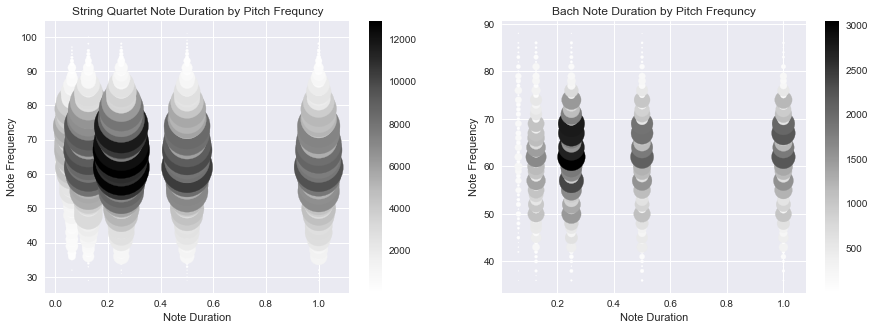

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

plt.subplot(1, 2, 1)
points = plt.scatter(StringsPD['NoteDuration']
            , StringsPD['NoteFreq']
            , c = StringsPD['Count']
            , s = (StringsPD['Count']/4))
#plt.legend(['Count'], loc='upper right')
plt.colorbar(points)
plt.title("String Quartet Note Duration by Pitch Frequncy")
plt.xlabel('Note Duration')
plt.ylabel('Note Frequency')

plt.subplot(1, 2, 2)
points = plt.scatter(BachPD['NoteDuration']
            , BachPD['NoteFreq']
            , c = BachPD['Count']
            , s = (BachPD['Count']/4))

plt.colorbar(points)
plt.title("Bach Note Duration by Pitch Frequncy")
plt.xlabel('Note Duration')
plt.ylabel('Note Frequency')
plt.savefig('FreqDurationCompare.png')

In [ ]:

plt.show()

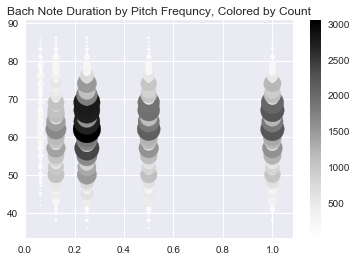

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [138]:
import numpy as np
import statsmodels.api as sm
sm.stats.ztest(StringsPD['NoteFreq'], BachPD['NoteFreq'])

(2.0300738444884221, 0.04234903371791305)

In [139]:
sm.stats.ztest(StringsPD['NoteDuration'], BachPD['NoteDuration'])

(0.19385697366446819, 0.84628787455890331)

In [140]:
sm.stats.ztest(StringsPD['Count'], BachPD['Count'])

(13.725221027838378, 7.1710115159729887e-43)

### Conculsion

First I checked if there was a statistical difference in the proportions of the note frequencies between the Bach chorales and the String Quartets and the note durations individually. The note frequencies alone showed evidence of a statistical difference in the proportions of the 2 samples. However, most likely due to the lack of triplet subdivisions, there was lack of evidence to show a statistically significant difference in durations between the Back compositions and the string quartets.

Finally I ran another z test on the count of the combinations of a given frequency and duration to see if there was evidence of a statistically significant difference in the 2 samples proportions. After engineering the feature of 'Count' described above there was considerable evidence of a difference between the note propotions between the Bach Chorales and the String Quartets. This means that after training a DNN with either just the String Quartets or the combination of String Quartets and the Bach Chorales will yield stylistically new output. 